#### This notebook contains
- The meaning of parameters in the 'compute_oblate_transit_lightcurve' function

- How to generate a light curve of the oblate planet with JoJo

- What is the oblateness signal like

'compute_oblate_transit_lightcurve' requires the following 5 parameters:

- transit parameters(array):\
    $t_0$: the mid-transit time\
    $b$: the impact parameter of transit\
    $P$: the orbital period (day)\
    $R_{eq}$: the equatorial radius of the planet/stellar radius\
    $f$: the planet oblateness\
    $\theta$: the planet spin obliquity, $-\pi/2\leq\theta\leq\pi/2$\
    $u_1,~u_2$: the quadratic limb-darkening coeeficients\
    $\log_{10}{\rho_{\star}}$: the stellar "mean density" (The stellar density assuming circular planetary orbit, which has a relationship with the true stellar mean density as eq(6) in <a href='https://iopscience.iop.org/article/10.1088/0004-637X/756/2/122'>Dawson & Johnson 2012</a>)

- time_array: the light curve time series (day).
- exp_time: the exposure time
- supersample_factor: The number of interpolations between data points for long exposures(exposure time $>$ 10 min)
- n_step: The step number of integral, and at least 30 steps are needed to reach $<$ 1 ppm precision. The default value is 30.

Let us take Kepler-167e as an example and calculate the light curve assuming the oblateness is $0.1$ and obliquity is $45^{\circ}$

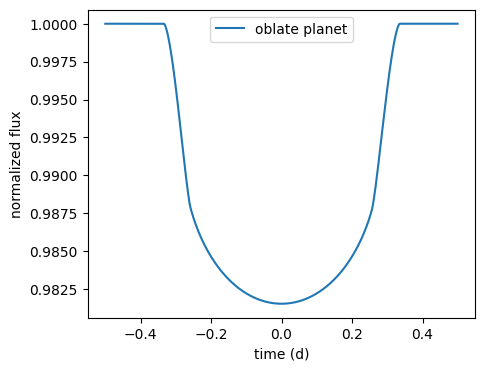

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import JoJo

t = np.arange(-0.5, 0.5, 1/60./24.)
pars = [0, 0.233, 1071.23228, 0.1281, 0.1, np.pi/4, 0.6226, 0.0498, 0.46] # From Kipping et al. 2016
f_ob, t_con = JoJo.compute_oblate_transit_lightcurve(pars, t)

fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.plot(t, f_ob, label='oblate planet')
ax.set_xlabel('time (d)')
ax.set_ylabel('normalized flux')
plt.legend()
plt.show()

We can also use 'compute_spherical_transit_lightcurve' to generate the light curve of a perfectly spherical planet with the same cross-section. The oblateness signal is defined as the difference of their light curves.

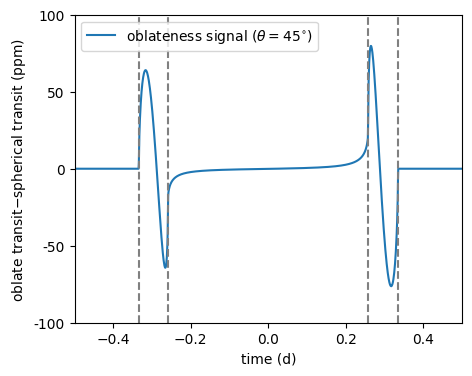

In [23]:
f_sp = JoJo.compute_spherical_transit_lightcurve(pars, t)

fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.plot(t, f_ob-f_sp, label=r'oblateness signal ($\theta=45^{\circ}$)')
for t_i in t_con:
    ax.axvline(t_i, ls='--', c='grey')

ax.set_xlabel('time (d)')
ax.set_ylabel('oblate transit$-$spherical transit (ppm)')
ax.set_yticks([0.0001, 0.00005, 0., -0.00005, -0.0001])
y_tick_labels = ['100', '50', '0', '-50', '-100']
ax.set_yticklabels(y_tick_labels)
ax.set_xlim(-0.5, 0.5)
plt.legend()
plt.show()

The shape of the oblateness signal primarily relies on the impact parameter $b$ and the obliquity $\theta$. When $b\neq0$, and $\theta\neq 0^{\circ}$ or $90^{\circ}$, the oblateness signal is asymmetrical. The figures illustrate distinct oblateness signals corresponding to different obliquities.

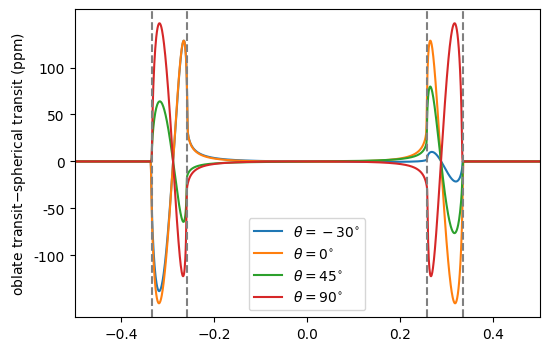

In [26]:
t = np.arange(-0.5, 0.5, 1/60./24.)
pars = [0, 0.233, 1071.23228, 0.1281, 0.1, np.pi/4, 0.6226, 0.0498, 0.46] # From Kipping et al. 2016

fig, ax = plt.subplots(1, 1, figsize=(6,4))
#color = ['limegreen', 'red', 'royalblue']
theta = [-30, 0, 45, 90]
for i in range(len(theta)):
    pars[5] = theta[i]*np.pi/180
    f_ob, t_con = JoJo.compute_oblate_transit_lightcurve(pars, t)
    f_sp = JoJo.compute_spherical_transit_lightcurve(pars, t)
    lab = r'$\theta={}$'.format(theta[i])
    ax.plot(t, f_ob-f_sp, label=lab+r'$^{\circ}$')

for t_i in t_con:
    ax.axvline(t_i, ls='--', color='grey')
    
ax.set_ylabel('oblate transit$-$spherical transit (ppm)')
ax.set_yticks([0.0001, 0.00005, 0., -0.00005, -0.0001])
y_tick_labels = ['100', '50', '0', '-50', '-100']
ax.set_yticklabels(y_tick_labels)
ax.set_xlim(-0.5, 0.5)
plt.legend()
plt.show()